# Analysis of agent-based model for experiment predictions

Tsvetkova, M., Olsson, H., & Galesic, M. (2024). Social networks affect redistribution decisions and polarization. https://doi.org/10.31219/osf.io/bw7ux

In [ ]:
import os, sys
import numpy as np
import warnings
warnings.filterwarnings('ignore')

module_path = os.path.abspath(os.path.join('modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from read_netlogo_data import *
from plot import *

DATA = 'sim-data/exp_high_ineq-table.csv' 

init_plot()

## Get the data

In [2]:
df = get_sim_data_exp(DATA)

# To analyze network properties, initial inequality, and vote polarization
df_first = df[df['period']==1]

# To analyze inequality after voting
df_second = df[df['period']==2]

# Create new df of initial conditions where each row is agent
df_long = get_agent_data_exp(df_first)
print(df_long.head())

   run network_type  num_observers  observed_mean_wealth  observed_gini  \
0    7         homo              8              151.8400       0.274067   
1    7         homo             11              156.5000       0.277207   
2    7         homo             12              150.6250       0.273333   
3    7         homo             12              157.6775       0.279057   
4    7         homo              9              151.9475       0.276423   

   observed_subj_ineq status  wealth   utility  vote  
0            0.397588      R   215.0  215.0000     8  
1            0.351955      R   180.0  163.7500    12  
2            0.340302      R   200.0  199.0625     0  
3            0.336467      R   205.0  174.3565    52  
4            0.374390      R   210.0  174.7935    74  


## Outcomes

### Voted tax rate and resulting inequality

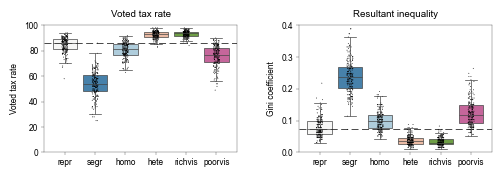

In [3]:
# Voted tax rate in the first round and 
# inequality in second round resulting from the vote 
gini_repr = np.median( df_second[(df_second['network_type']=='repr')]['gini'].values )
vote_repr = np.median( df_first[(df_first['network_type']=='repr')]['median_vote'].values )

plot2_y_net_box(data1=df_first, y1='median_vote', title1='Voted tax rate', 
                ylim1=(0, 100), 
                data2=df_second, y2='gini', title2='Resultant inequality', 
                ylim2=(0, 0.4), 
                baseline1=vote_repr, baseline2=gini_repr)

### Vote polarization

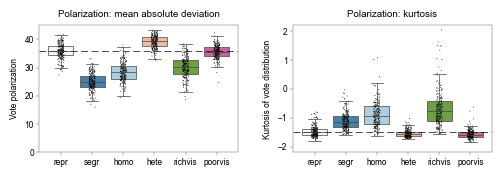

In [4]:
# Distribution plot of vote variance and kurtosis in first period
var_repr = np.median( df_first[(df_first['network_type']=='repr')]['vote_var'].values )
mad_repr = np.median( df_first[(df_first['network_type']=='repr')]['vote_mad'].values )
kurt_repr = np.median( df_first[(df_first['network_type']=='repr')]['vote_kurt'].values )

plot2_y_net_box(data1=df_first, y1='vote_mad', title1='Polarization: mean absolute deviation', 
                ylim1=(0, 45), 
                data2=df_first, y2='vote_kurt', title2='Polarization: kurtosis', 
                ylim2=(-2.2, 2.2), 
                baseline1=mad_repr, baseline2=kurt_repr)


### Combined visualization

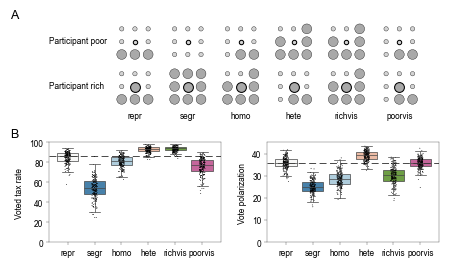

In [5]:
# Plot for the paper
plot_experiment(df_first, baseline1=vote_repr, baseline2=mad_repr, 
                save='plots/fig2.pdf')

## Additional checks

### Assortativity, visibility, and observed inequality

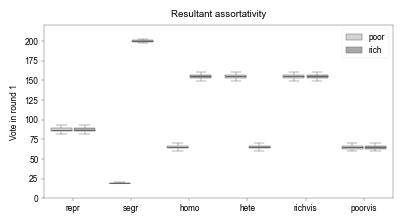

In [6]:
# Assortativity
mean_init_wealth = np.mean( df_long['wealth'].values )
plot1_y_hue_net_box(df_long, y='observed_mean_wealth', hue='status',
                   title='Resultant assortativity', ylim=(0, 220), 
                   baseline=mean_init_wealth)

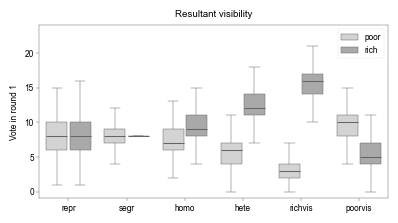

In [7]:
# Visibility
plot1_y_hue_net_box(df_long, y='num_observers', hue='status',
                   title='Resultant visibility', ylim=(-1, 24), 
                   baseline=8)

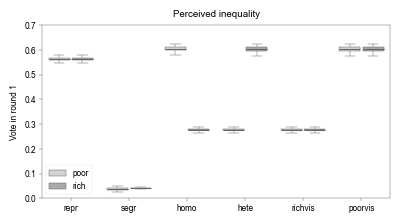

In [8]:
# Perceived inequality
mean_init_gini = np.mean( df_first['gini'].values )
plot1_y_hue_net_box(df_long, y='observed_gini', hue='status',
                   title='Perceived inequality', ylim=(0, 0.7), 
                   baseline=mean_init_gini)

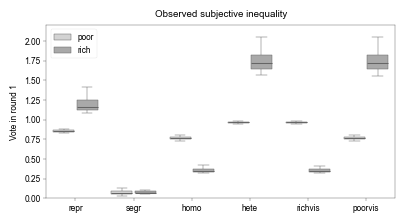

In [9]:
# Perceived subjective inequality
plot1_y_hue_net_box(df_long, y='observed_subj_ineq', hue='status',
                   title='Observed subjective inequality', ylim=(0, 2.2), 
                   baseline=None)

### Polarization as group divergence - median vote distance between rich and poor

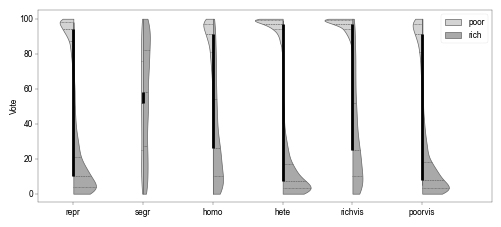

In [10]:
# Distribution of individual votes by status (rich/poor) and treatment
# Black points and lines show medians with CIs estimated via bootstrapping: 
# a procedure where the dataset is randomly resampled with replacement 
# a number of times, and the estimate is recalculated from each resample. 
plot1_votes_by_status(df_long)